<a href="https://colab.research.google.com/github/Liam-Nova/BIT_IA_Bootcamp/blob/main/S2_C2_RDG_Marketing_target_income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de Regresión Gradiente



In [ ]:
import pandas as pd  # Para el manejo de los datos
import numpy as np # Para el manejo de operaciones entre datos, y las columnas
import matplotlib.pyplot as plt # Para el manejo de las graficas
import seaborn as sns # Para el manejo de graficas
from google.colab import drive # Conectanonos con google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os    # la librería necesaria para la ruta de la carpeta
os.chdir('/content/drive/MyDrive/Colab Notebooks/BIT_Bootcam_IA/DataSET')

In [ ]:
#mostar lista de archivos
os.listdir()

['marketing_campaign.csv',
 'marketing_campaign.xlsx',
 'marketing_extract_2X_Income.xlsx',
 'linear_regression_model (1).pkl',
 'poly_regression_model (1).pkl']

In [ ]:
df = pd.read_excel('marketing_extract_2X_Income.xlsx')

2. Explorar datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   MntMeatProducts  2216 non-null   int64
 1   MntWines         2216 non-null   int64
 2   Income           2216 non-null   int64
dtypes: int64(3)
memory usage: 52.1 KB


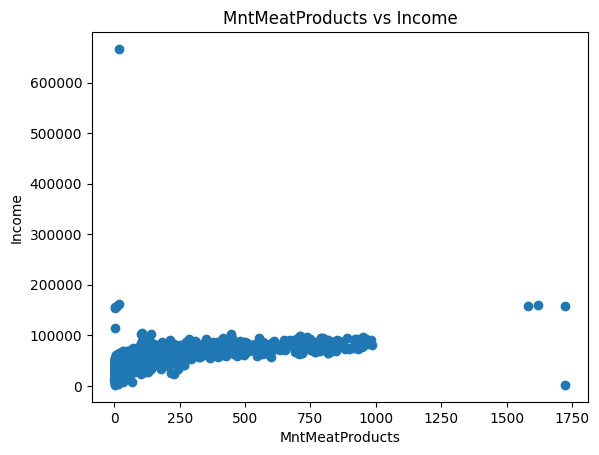

In [ ]:
# Scatter (eje X, eje Y)
plt.scatter(df['MntMeatProducts'], df['Income'])
plt.title('MntMeatProducts vs Income')
plt.xlabel('MntMeatProducts')
plt.ylabel('Income')
plt.show()

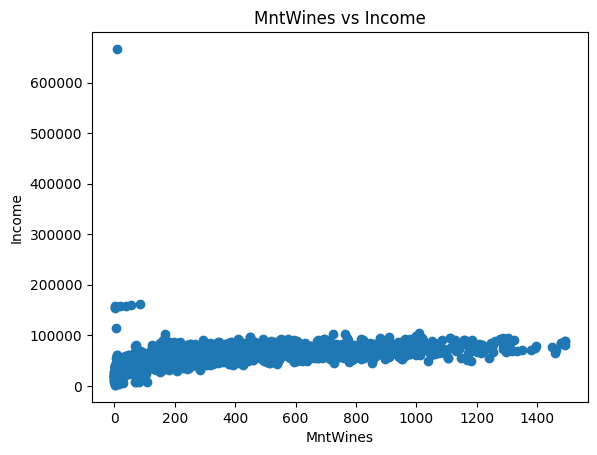

In [ ]:
# Scatter (eje X, eje Y)
plt.scatter(df['MntWines'], df['Income'])
plt.title('MntWines vs Income')
plt.xlabel('MntWines')
plt.ylabel('Income')
plt.show()

In [ ]:
# --->Eliminar datos atípicos del Income

Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
# ~ en la lógica booleana representa negación
# | representa el OR ( o uno o el otro, se tiene cumplir una única condición)
# & representa AND ( uno Y el otro se tienen que cumplir dos condiciones)
df = df[~((df['Income'] < (Q1-1.5*IQR))|(df['Income'] > (Q3+1.5*IQR)))]

In [ ]:
# --->Eliminar datos atípicos del MntWines

Q1 = df['MntWines'].quantile(0.25)
Q3 = df['MntWines'].quantile(0.75)
IQR = Q3 - Q1
# ~ en la lógica booleana representa negación
# | representa el OR ( o uno o el otro, se tiene cumplir una única condición)
# & representa AND ( uno Y el otro se tienen que cumplir dos condiciones)
df = df[~((df['MntWines'] < (Q1-1.5*IQR))|(df['MntWines'] > (Q3+1.5*IQR)))]

In [ ]:
# --->Eliminar datos atípicos del MntMeatProducts

Q1 = df['MntMeatProducts'].quantile(0.25)
Q3 = df['MntMeatProducts'].quantile(0.75)
IQR = Q3 - Q1
# ~ en la lógica booleana representa negación
# | representa el OR ( o uno o el otro, se tiene cumplir una única condición)
# & representa AND ( uno Y el otro se tienen que cumplir dos condiciones)
df = df[~((df['MntMeatProducts'] < (Q1-1.5*IQR))|(df['MntMeatProducts'] > (Q3+1.5*IQR)))]

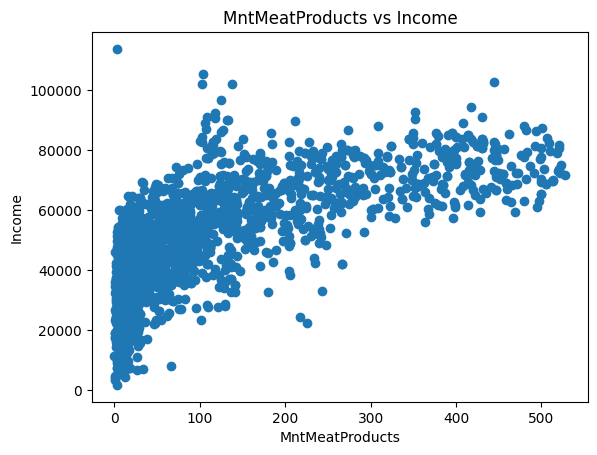

In [ ]:
# Scatter (eje X, eje Y)
plt.scatter(df['MntMeatProducts'], df['Income'])
plt.title('MntMeatProducts vs Income')
plt.xlabel('MntMeatProducts')
plt.ylabel('Income')
plt.show()

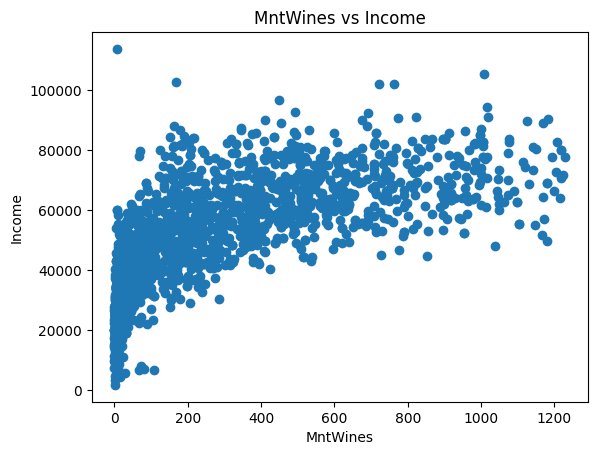

In [ ]:
# Scatter (eje X, eje Y)
plt.scatter(df['MntWines'], df['Income'])
plt.title('MntWines vs Income')
plt.xlabel('MntWines')
plt.ylabel('Income')
plt.show()

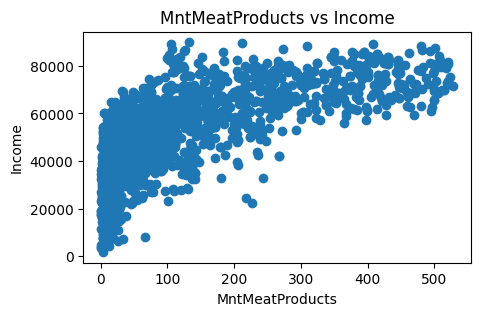

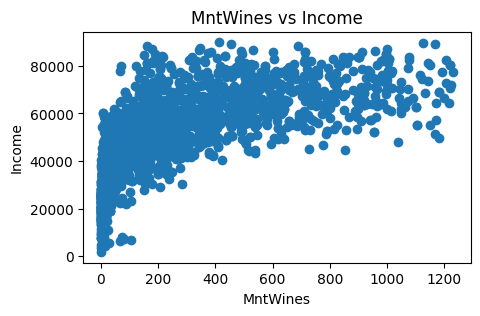

In [ ]:
df = df[df['Income']< 100000] # le asigna un tope a los datos que son evaluados

plt.figure(figsize=(5,3))
plt.scatter(df['MntMeatProducts'], df['Income'])
plt.title('MntMeatProducts vs Income')
plt.xlabel('MntMeatProducts')
plt.ylabel('Income')
plt.show()

plt.figure(figsize=(5,3))
plt.scatter(df['MntWines'], df['Income'])
plt.title('MntWines vs Income')
plt.xlabel('MntWines')
plt.ylabel('Income')
plt.show()

# 2. Inicialización de parámetros

In [ ]:
theta = 80
intercept = 5000

3. Predicción

In [ ]:
# y = b + mX
# h = b + Theta(X1)
df['Hipotesis'] = intercept + theta * df['MntMeatProducts'] # creacion de un nuevo parametro o atributo

Text(0.5, 1.0, 'Grafica de los  datos Versus los Valores Predichos')

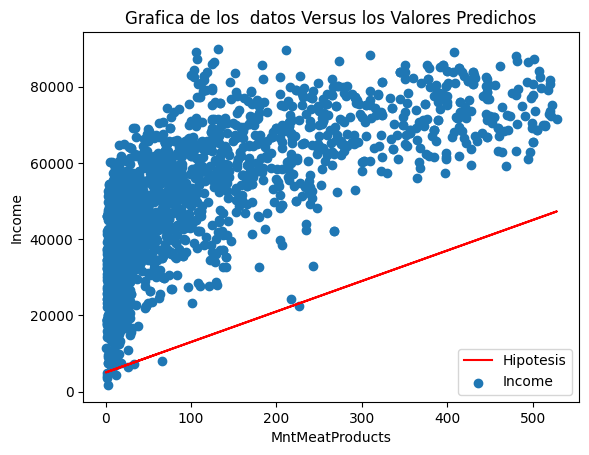

In [ ]:
plt.plot(df['MntMeatProducts'],df['Hipotesis'],color='red')
plt.scatter(df['MntMeatProducts'],df['Income']) # Parametros graficados
plt.legend(['Hipotesis','Income']) # Colores e imagenes de los datos dentro de la grafica
plt.xlabel('MntMeatProducts') # Titulo eje X
plt.ylabel('Income') # Titulo eje Y
plt.title('Grafica de los  datos Versus los Valores Predichos') # Titulo del grafico
